<a href="https://colab.research.google.com/github/The-Godfatherr/LAB-AIML/blob/main/Lab_6_Abhinav_Verma_E23CSEU1335.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN

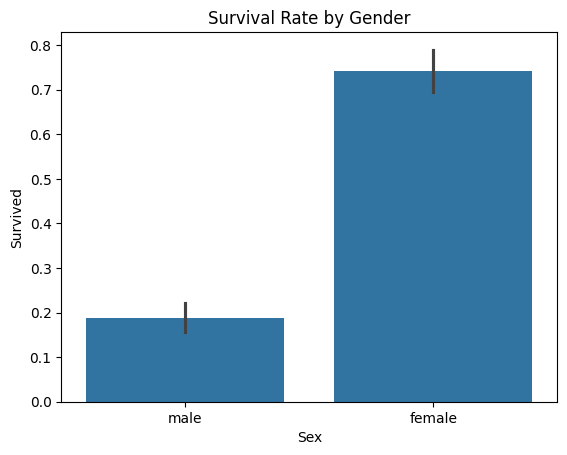


Survival rate by age category:
AgeBin
Child          0.579710
Teenager       0.428571
Young Adult    0.382682
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


/tmp/ipython-input-2810340246.py:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeBin')['Survived'].mean())


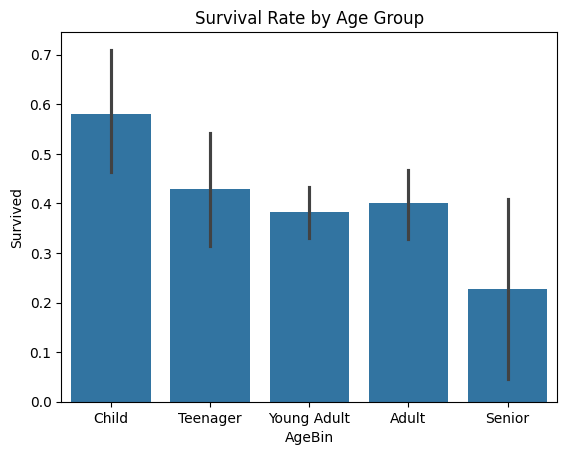

/tmp/ipython-input-2810340246.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-2810340246.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr


Train set results:
[[377  62]
 [ 79 194]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       439
           1       0.76      0.71      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

Accuracy: 0.8019662921348315

Test set results:
[[98 12]
 [22 47]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

Accuracy: 0.8100558659217877


In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the dataset (use direct link or upload)
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
print("First 5 rows:")
print(df.head())

# Step 3: Explore and visualize the dataset
# Total number of people survived
print("\nTotal number of people survived / not survived:")
print(df['Survived'].value_counts())

# Survival rate based on gender
print("\nSurvival rate by gender:")
print(df.groupby('Sex')['Survived'].mean())
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

# Survival rate based on age category
# Create bins for age
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 80],
                      labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
print("\nSurvival rate by age category:")
print(df.groupby('AgeBin')['Survived'].mean())
sns.barplot(x='AgeBin', y='Survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()

# Step 4: Pre-process the data
# Drop columns not needed
df = df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, columns=['Sex','Embarked','AgeBin'], drop_first=True)

# Step 5: Define features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Step 6: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)

# Step 7: Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 8: Print classification metrics
print("\nTrain set results:")
y_pred_train = model.predict(X_train)
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))
print("Accuracy:", accuracy_score(y_train, y_pred_train))

print("\nTest set results:")
y_pred_test = model.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print("Accuracy:", accuracy_score(y_test, y_pred_test))
